<a href="https://colab.research.google.com/github/SrMouraSilva/Modelagem-matematica-trabalho-final/blob/main/6_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Programação simbólica
from sympy import *
from sympy.plotting import plot, plot3d
 
# Exibir símbolos nos plots
from google.colab.output._publish import javascript
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.1.2/latest.js?config=default"
 
javascript(url=url)
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()
 
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Questão 6.22

Reconsider the whale problem of Example 6.4. In this problem we will explore the behavior of the blue whale population. Assume that $\alpha=10^{-8}$ and begin with $x_1=5{,}000$ blue whales and $x_2=70{,}000$ fin whales.

Relembrando o Exemplo 6.4
> **Exemplo 6.4** Reconsider the whale problem of Example 4.2, but now suppose that we use a discrete model to project population growth with a time step of several years. We know that for a time step of one year, the discrete and continuous time models behave in essentially the same manner. How large a timestep can we use and still retain the same qualitative behavior as the continuoustime model? What happens to the model if we use too large a time step?

Relembrando o Exemplo 4.2
> **Exemplo 4.2** The blue whale and fin whale are two similar species that inhabit the same areas. Hence, they are thought to compete. The intrinsic growth rateof each species is estimated at 5% per year for the blue whale and 8% per year for the fin whale. The environmental carrying capacity (the maximum numberof whales that the environment can support) is estimated at $150{,}000$ blues and $400{,}000$ fins. The extent to which the whales compete is unknown. In the last 100 years intense harvesting has reduced the whale population to around $5{,}000$ blues and $70{,}000$ fins. Will the blue whale become extinct?

### a) Use the Euler method with a time step of $h=\Delta t = 1$ year. Simulate $N=50$ time steps and describe the behavior of the blue whale population over time.

Temos as seguintes equações para o modelo

In [ ]:
def equacoes(x1, x2, alpha):
    return (
        0.05*x1*(1-(x1/150_000)) - alpha*x1*x2,
        0.08*x2*(1-(x2/400_000)) - alpha*x1*x2
    )

x1, x2 = var('x1 x2', real=True)

dFdx1, dFdx2 = equacoes(x1, x2, alpha=1e-8)


Math(f"""
\\begin{{aligned}}
\\frac{{dx_1}}{{dt}} = {latex(dFdx1)} \\\\
\\frac{{dx_2}}{{dt}} = {latex(dFdx2)} \\\\
\\end{{aligned}}
""")

<IPython.core.display.Math object>

Aplicando o método de Euler para o sistemas de equações acima, podemos observar que a populção final das baleias-azuis é bem menor se comparado com a população final das baleias-comuns mesmo que o crescimento da população das baleias-azuis tenha sido bem mais rápido do que o crescimento da população das baleias-comuns. Isso pode ser visto no gráfico abaixo, sendo a linha que representa a população de baleias-azuis ($x_1$) ao longo do tempo está colorida de azul e a linha que representa a população de baleias-comuns ($x_2$) está colorida de laranja. 

In [ ]:
def MetodoEuler(funcoes, variaveis, x1_0, x2_0, N=100, t_0=0, T=400):
    retorno = np.zeros((3, N))
    f1 = lambdify(variaveis, funcoes[0], 'numpy')
    f2 = lambdify(variaveis, funcoes[1], 'numpy')
    
    x1_n = x1_0
    x2_n = x2_0
    t_n = t_0

    retorno[:, 0] = [t_n, x1_n, x2_n]

    h = (T-t_0)/N
    for n in range(N-1):
        x1_n = x1_n + h*f1(x1_n, x2_n)
        x2_n = x2_n + h*f2(x1_n, x2_n)
        t_n = t_n+h

        retorno[:, n+1] = [t_n, x1_n, x2_n]
    
    return pd.DataFrame(retorno.T, columns=['t', 'x1', 'x2'])

simulacao_a = MetodoEuler(
    funcoes=(dFdx1, dFdx2),
    variaveis=(x1, x2),
    x1_0=5_000,
    x2_0=70_000,
    N=50,
    T=50
)

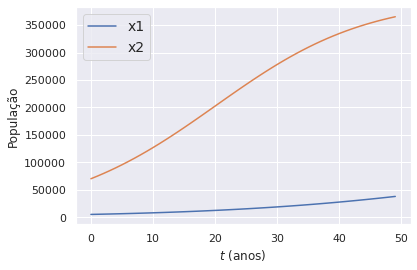

In [ ]:
simulacao_a[['x1', 'x2']].plot(ylabel='População', xlabel="$t$ (anos)")

Vejamos o comportamento da simulação por meio de um gráfico sobre um campo vetorial (setas azuis). O gráfico seguinte apresenta a simulação (linha vermelha) em que ocorre a coexistência entre as duas espécies. Note que a simulaão não chega no ponto de estabilidade, isto se deu pelas as restrições de tempo de execução solicitadas no enunciado ($h$ e $N$),

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


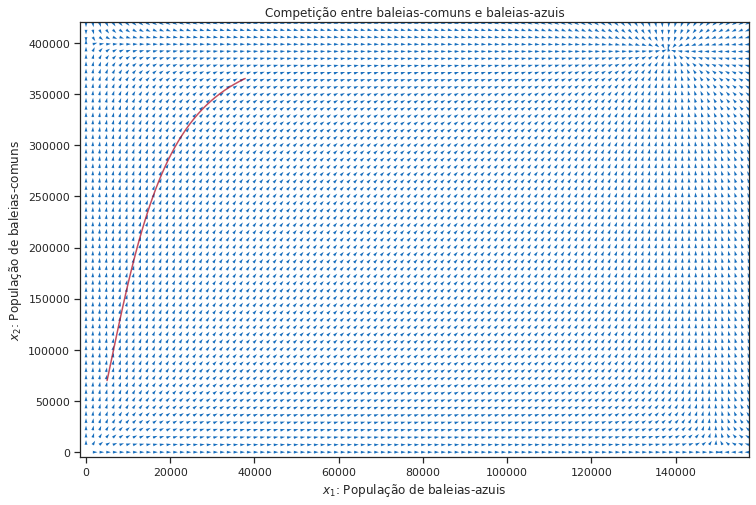

In [ ]:
def campo_vetorial(plots, cores, xlim, ylim, alpha, plot_campo_vetorial=True, legenda=None, solucoes=None):
    fig = plt.figure(figsize=(12, 8))

    if plot_campo_vetorial:
        sns.set_style("ticks")
        x1graf, x2graf = np.meshgrid(np.linspace(0, xlim[1], 100), np.linspace(0, ylim[1], 60))
        f1, f2 = equacoes(x1graf, x2graf, alpha=alpha)
        normalizador = np.sqrt(f1**2+f2**2)
        plt.quiver(x1graf, x2graf, f1/normalizador, f2/normalizador, color='#156dbd', angles='xy', figure=fig)

    ax = plt.axes()
    ax.set_title("Competição entre baleias-comuns e baleias-azuis")
    ax.set_xlabel('$x_1$: População de baleias-azuis')
    ax.set_ylabel('$x_2$: População de baleias-comuns')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    if solucoes is not None:
        plt.scatter(solucoes[0], solucoes[1], marker='o', edgecolors='black', color='w')
    
    for plot, cor in zip(plots, cores):
        ax.plot(*plot, color=cor,)

    if legenda is not None:
        plt.legend(legenda)

    plt.show();
    sns.set_theme()


campo_vetorial(
    [[simulacao_a.x1, simulacao_a.x2]],
    xlim=[-1_500, 150_000*1.05],
    ylim=[-5_000, 400_000*1.05],
    alpha=1e-8,
    cores=['#b00d23bb']*100,
)

### b) Repeat the simulation of part (a) with $N=50$ time steps for each of the cases $h=5, 10, 20, 30, 35$ and $40$. How does the behavior of the blue whale population change as the time step $h$ increases?

Realizando as simulações solicitadas no enunciado:




In [ ]:
hs = [5, 10, 20, 30, 35, 40]

simulacoes_b = [
    MetodoEuler(
        funcoes=(dFdx1, dFdx2),
        variaveis=(x1, x2),
        x1_0=5_000,
        x2_0=70_000,
        N=50,
        T=50*h
    )
    for h in hs
]

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """


Fazendo uma comparação entre os gráficos com passos $h = 5, 10, 20$ abaixo, podemos observar que o comportamento de crescimento da população das baleias-azuis muda pouco ao longo do tempo. Já a comparação entre os gráficos com passos $h = 30, 35$ abaixo, a mudança já é mais visível, pois haverá vários picos de crescimento e de decrescimento da população das baleias-azuis. Já no gráfico com passo $h = 40$ abaixo, o método de Euler não converge, pois o número de baleias-comuns é negativo no tempo final, logo nada pode ser dito sobre o crescimento da população das baleias-azuis. 
 
Nos gráficos com passos $h = 5, 10, 20$ abaixo, a coexistência entre as duas espécies existirá ao longo do tempo. Além disso, as duas espécies se aproximarão de seus repectivos tamanhos populacionais máximos ($150{,}000$ baleias-azuis, $400{,}000$ baleias-comuns) nos gráficos com passos $h = 5, 10, 20$ abaixo, respeitando o efeito da competição entre as espécies ($\alpha x_1 x_2=10^{-8} x_1 x_2$ das derivadas $\frac{dx_1}{dt}$ e $\frac{dx_2}{dt}$). 
 
Nos gráficos com passos $h = 30, 35$, a população de baleias-azuis converge, mas é incrementado bastante ruído na população de baleias-comuns, de modo que não é possível usar a simulação de forma confiável. Já para $h = 40$, essa análise não pode ser feita, pois o método de Euler não converge.
 
 
A legenda dos gráficos abaixo indica a linha que representa a população de baleias-azuis (x1) ao longo do tempo está colorida de azul e a linha que representa a população de baleias-comuns (x2) está colorida de laranja.

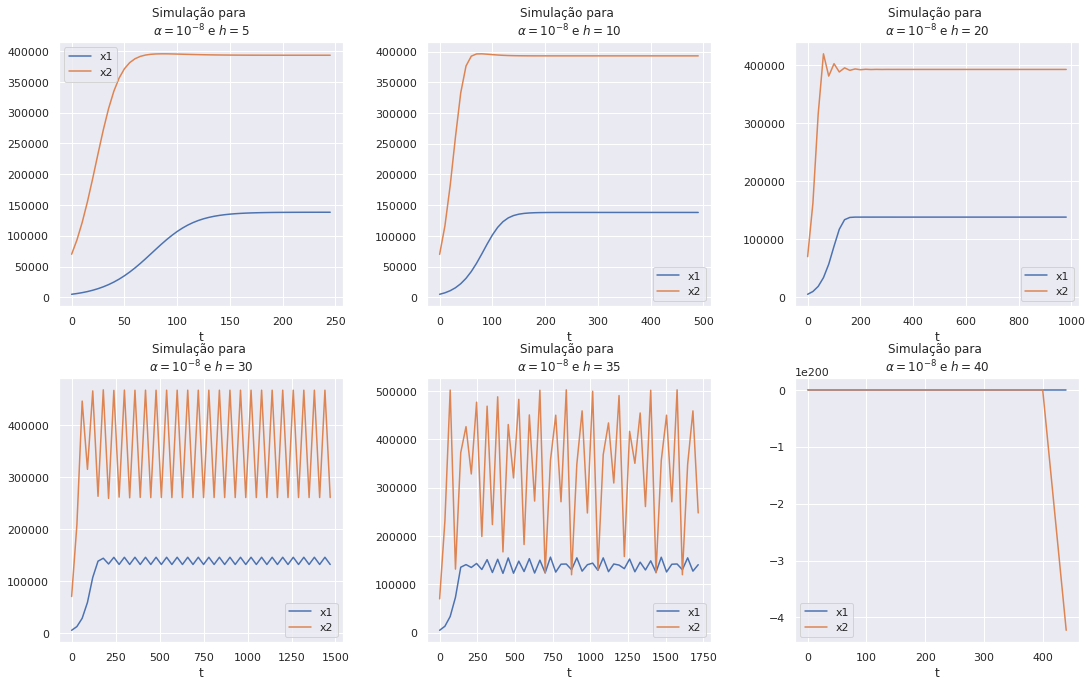

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.tight_layout(pad=4.0)

for i, (s, ax, h) in enumerate(zip(simulacoes_b, axes.flatten(), hs)):
    s = s.copy()
    s.index = s.t
    del s['t']

    s.plot(ax=ax, title=f'Simulação para \n$\\alpha=10^{{-8}}$ e $h={h}$')

### c) Repeat part (b) for $\alpha=10^{-7}$ and $\alpha=10^{-9}$. How sensitive are your conclusions in part (b) to the assumption that $\alpha=10^{-8}$?

Realizando as simulações solicitadas no enunciado:

A legenda dos gráficos a seguir indica a linha que representa a população de baleias-azuis (x1) ao longo do tempo está colorida de azul e a linha que representa a população de baleias-comuns (x2) está colorida de laranja.


/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in double_scalars
  """


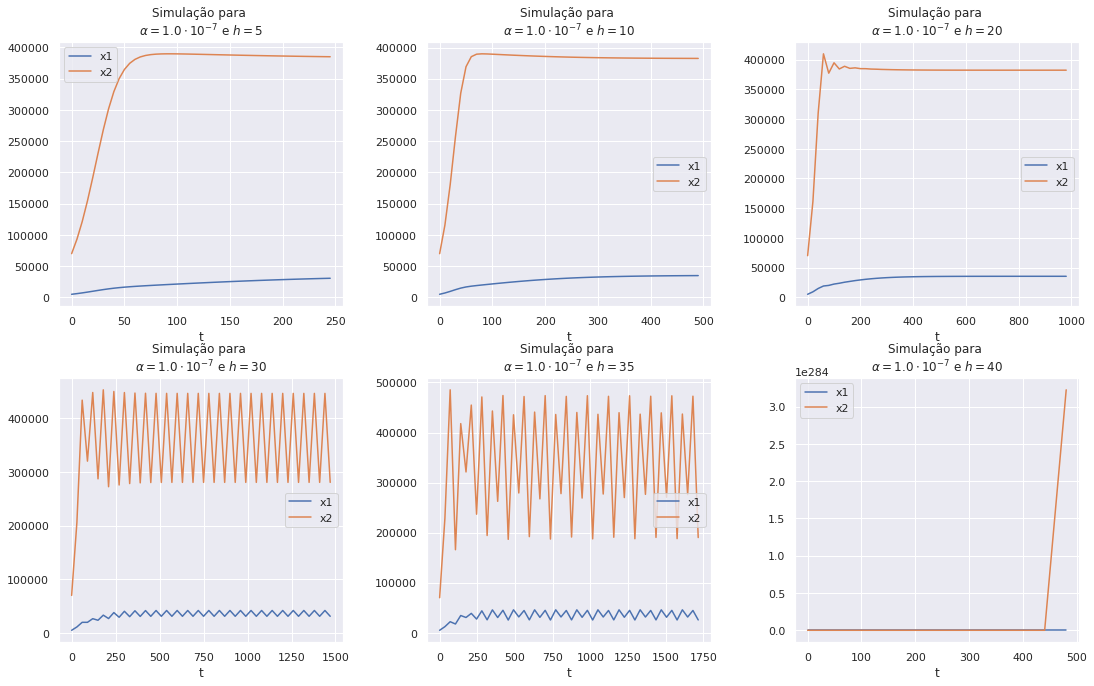

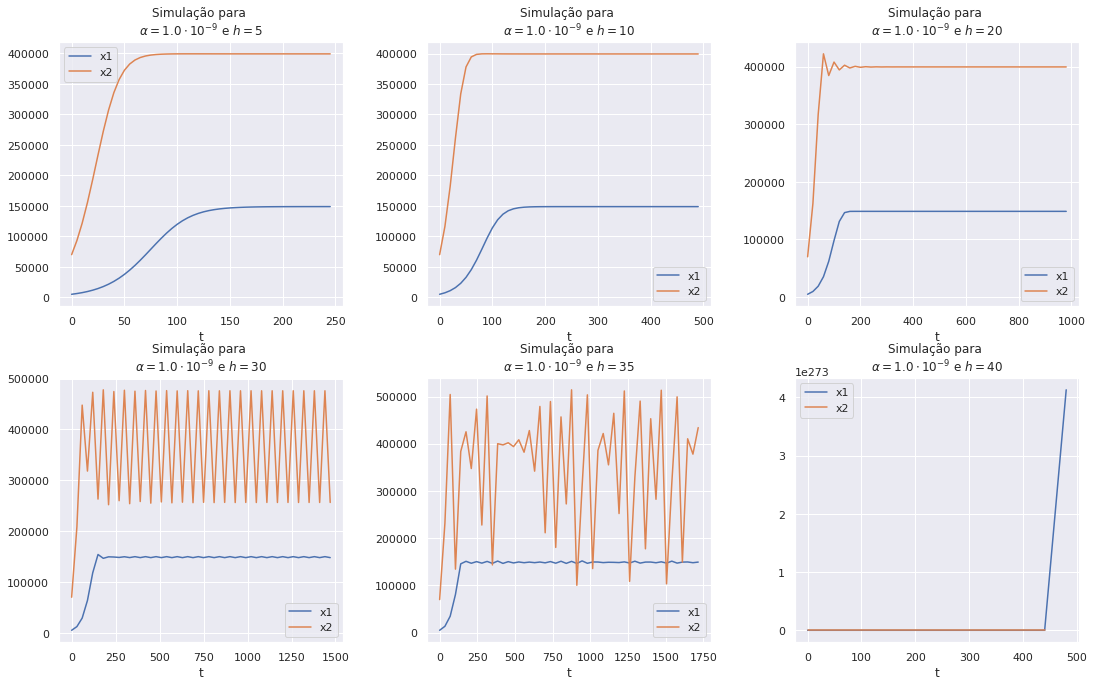

In [ ]:
alphas = [1e-7, 1e-9]


for alpha in alphas:
    dFdx1, dFdx2 = equacoes(x1, x2, alpha=alpha)

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
    fig.tight_layout(pad=4.0)

    simulacoes_c = [
        MetodoEuler(
            funcoes=(dFdx1, dFdx2),
            variaveis=(x1, x2),
            x1_0=5_000,
            x2_0=70_000,
            N=50,
            T=50*h
        )
        for h in hs
    ]

    for i, (s, ax, h) in enumerate(zip(simulacoes_c, axes.flatten(), hs)):
        s = s.copy()
        s.index = s.t
        del s['t']

        s.plot(ax=ax, title=f'Simulação para \n$\\alpha={latex(N(alpha))}$ e $h={h}$')

#### **Cenário 1:** $\alpha = 10^{-7}$
 
Fazendo uma comparação entre os gráficos com passos $h = 5, 10, 20$, podemos observar que o comportamento de crescimento da população das baleias-azuis muda pouco ao longo do tempo, ou seja as mesmas observações feitas no item $b)$. Já a comparação entre os gráficos com passos $h = 30, 35$ acima, a mudança já é mais visível, pois haverá vários picos de crescimento e de decrescimento da população das baleias-azuis, ou seja as mesmas observações feitas no item $b)$.
 
Já no gráfico com passo $h = 40$ acima, o método de Euler não converge, pois o número de baleias-comuns explode no início da simulação. Observe que o tempo final indicado é $500$, mas deveria ser $2000$.
 
Nos gráficos com passos $h = 5, 10, 20$acima, a coexistência entre as duas espécies existirá ao longo do tempo. 
Observe, no entanto, que o efeito da competição entre as espécies é bem maior ($\alpha x_1 x_2=10^{-7} x_1 x_2$ das derivadas $\frac{dx_1}{dt}$ e $\frac{dx_2}{dt}$) comparado ao item $a)$, de modo que a população de baleias-azuis no ponto estável fica próximo dos $50{,}000$.
 
Nos gráficos com passos $h = 30, 35$, a população de baleias-azuis converge, mas é incrementado bastante ruído na população de baleias-comuns, de modo que não é possível usar a simulação de forma confiável. Já para $h = 40$, essa análise não pode ser feita, pois o método de Euler não converge, ou seja as mesmas observações feitas no item $b)$.

#### **Cenário 2:** $\alpha = 10^{-9}$
 
Fazendo uma comparação entre os gráficos com passos $h = 5, 10, 20$ acima, podemos observar que o comportamento de crescimento da população das baleias-azuis muda pouco ao longo do tempo, ou seja as mesmas observações feitas no item $b)$. Já a comparação entre os gráficos com passos $h = 30, 35$ acima, a mudança já é mais visível, pois haverá vários picos de crescimento e de decrescimento da população das baleias-azuis, ou seja as mesmas observações feitas no item $b)$. 
 
Já no gráfico com passo $h = 40$ acima, o método de Euler não converge, pois a população de baleias-azuis explode no início da simulação. Observe que o tempo final indicado é $500$, mas deveria ser $2000$.
 
 
Nos gráficos com passos $h = 5, 10, 20$acima, a coexistência entre as duas espécies existirá ao longo do tempo. Além disso, as duas espécies se aproximarão de seus repectivos tamanhos populacionais máximos ($150{,}000$ baleias-azuis, $400{,}000$ baleias-comuns) nos gráficos com passos $h = 5, 10, 20$ acima. Note, que o efeito menor da competição entre as espécies ($\alpha x_1 x_2=10^{-8}x_1 x_2$ das derivadas $\frac{dx_1}{dt}$ e $\frac{dx_2}{dt}$) resultará em uma população mais próxima dos limites populacionais máximos do que no caso de $\alpha=10^{-7}$ ($c)$ Cenário 1).
 
Nos gráficos com passos $h = 30, 35$, a população de baleias-azuis converge, mas é incrementado bastante ruído na população de baleias-comuns, de modo que não é possível usar a simulação de forma confiável. Já para $h = 40$, essa análise não pode ser feita, pois o método de Euler não converge, ou seja as mesmas observações feitas no item $b)$.

### d) Repeat part (b) starting from the initial condition $x_1=150{,}000 $ blue whales and $x_2=400{,}000$ fin whales, and assume that $\alpha=10^{-8}$. How sensitive are your conclusions in part (b) to the assumption that we start with $x_1=5{,}000$ blue whales and $x_2=70{,}000$ fin whales?

Realizando as simulações solicitadas no enunciado:

A legenda dos gráficos abaixo indica a linha que representa a população de baleias-azuis (x1) ao longo do tempo está colorida de azul e a linha que representa a população de baleias-comuns (x2) está colorida de laranja.


/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in double_scalars
  """


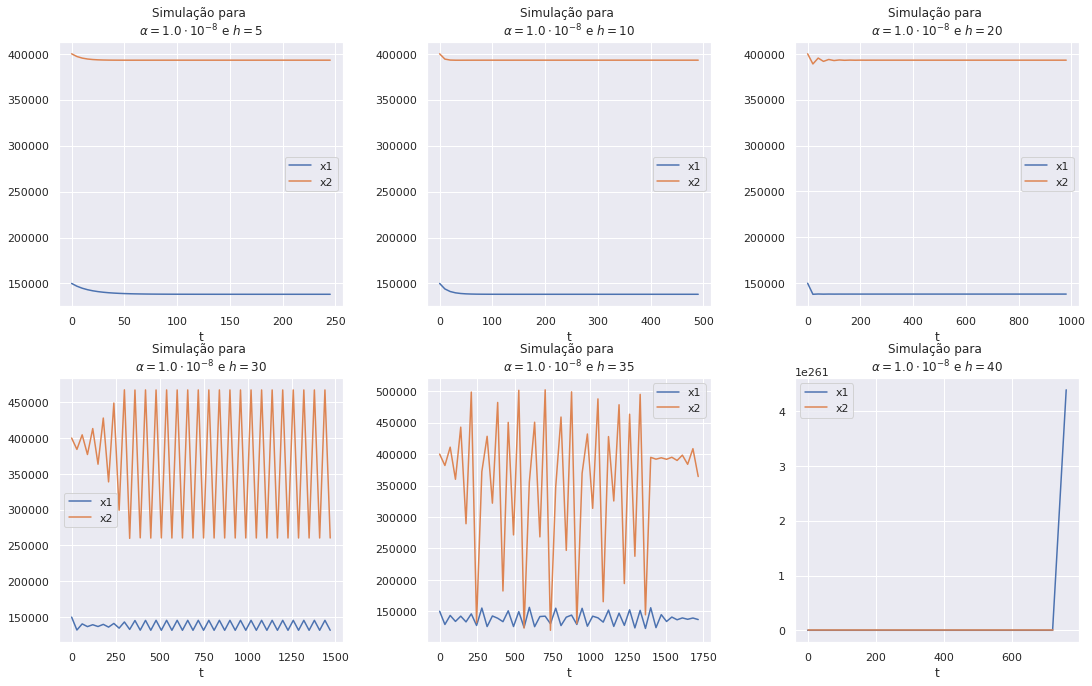

In [ ]:
alphas = [1e-8]


for alpha in alphas:
    dFdx1, dFdx2 = equacoes(x1, x2, alpha=alpha)

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
    fig.tight_layout(pad=4.0)

    simulacoes_c = [
        MetodoEuler(
            funcoes=(dFdx1, dFdx2),
            variaveis=(x1, x2),
            x1_0=150_000,
            x2_0=400_000,
            N=50,
            T=50*h
        )
        for h in hs
    ]

    for i, (s, ax, h) in enumerate(zip(simulacoes_c, axes.flatten(), hs)):
        s = s.copy()
        s.index = s.t
        del s['t']

        s.plot(ax=ax, title=f'Simulação para \n$\\alpha={latex(N(alpha))}$ e $h={h}$')

Fazendo uma comparação entre os gráficos com passos $h = 5, 10, 20$, $x_1 = 150{,}000$ e $x_2 = 400{,}000$ acima, podemos observar que o comportamento de decrescimento da população das baleias-azuis muda pouco ao longo do tempo, ou seja, observações diferentes das que foram feitas no item $b)$, pois houve decrescimento e não crescimento. O decrescimento ocorre pelo efeito da competição entre as espécies.

Já a comparação entre os gráficos com passos $h = 30, 35$ acima, a mudança já é mais visível, pois haverá vários picos de crescimento e de decrescimento da população das baleias-azuis.
Para o gráfico com passo $h = 40$ acima, o método de Euler não converge, pois o número de baleias-comuns explode no início da simulação. Observe que ocorre próximo do passo $600$, mas a simulação deveria ocorrer até $t=1940$. Nota-se que a "explosão" ocorre depois do que as simulações do item $c)$ com o mesmo $h=40$.

Nos gráficos com passos $h = 5, 10, 20, 30, 35$, $x_1 = 150{,}000$ e $x_2 = 400{,}000$ acima, a coexistência entre as duas espécies existirá ao longo do tempo.<!-- Além disso, as duas espécies se aproximarão do mesmo ponto de estabilidade encontrado no item $a)$ nos gráficos com passos $h = 5, 10, 20$, $x_1 = 150,000$ e $x_2 = 400,000$ acima, ou seja observações diferentes das que foram feitas no item $b)$, pois as duas espécies se aproximam dos seus respectivos tamanhos populacionais máximos ($150,000$ baleias-azuis, $400,000$ baleias-comuns) no item $b)$. Já no gráfico com passo, $x_1 = 150,000$ e $x_2 = 400,000$ acima, essa análise não pode ser feita, pois o método de Euler não converge. -->
Nos gráficos com passos $h = 30, 35$, a população de baleias-azuis converge, mas é incrementado bastante ruído na população de baleias-comuns, de modo que não é possível usar a simulação de forma confiável. Já para $h = 40$, essa análise não pode ser feita, pois o método de Euler não converge, ou seja as mesmas observações feitas no item $b)$.
